# Implementing all models 


In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
df = pd.read_csv("NAS.csv")                         #Read the csv
df.iloc[:, 0]= pd.to_datetime(df.iloc[:, 0])        #Convert date to datetime  
df.set_index('Date',inplace=True)                   #Setting date as index

In [3]:
df.replace(0, np.nan, inplace=True) #Replacing 0 with NaN
df.dropna(inplace=True)  #Dropping all columns with NaN
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [4]:
X = df[['Open']]
y= (df['Close']) 


In [5]:
from sklearn.model_selection import train_test_split #Creating a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:

from sklearn import preprocessing
# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)  #Fits it with a linar regression

from sklearn.linear_model import SGDRegressor
# SkLearn SGD classifier
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

from sklearn.tree import DecisionTreeRegressor
DTreeModel = DecisionTreeRegressor(max_depth=100)
DTreeModel.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=100)

In [50]:

print("LinearRegression intercept" +str(regressor.intercept_))
print("LinearRegression coef" +str(regressor.coef_))

print("SGDRegression intercept" +str(sgd.intercept_))
print("SGDRegression coef" +str(sgd.coef_))


LinearRegression intercept80.28803066101693
LinearRegression coef[55.3016636]
SGDRegression intercept[80.28087039]
SGDRegression coef[55.3020702]


In [51]:
LR_pred = regressor.predict(X_test)
SGD_pred = sgd.predict(X_test)
Dtree_pred = DTreeModel.predict(X_test)


In [52]:
from sklearn import metrics
print("SGD Regressor")
print('Mean Squared Error :',metrics.mean_squared_error(y_test, sgd.predict(X_test)))
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, sgd.predict(X_test)))
print("Score:", sgd.score(X_test, y_test))
print("\nLinear Regressor")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, LR_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, LR_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LR_pred)))
print("Score:", regressor.score(X_test, y_test))

SGD Regressor
Mean Squared Error : 6.086529922875998
Mean Absolute Error : 1.5288523373785279
Score: 0.9979153865848661

Linear Regressor
Mean Absolute Error: 1.5290304839950808
Mean Squared Error: 6.088779658694799
Root Mean Squared Error: 2.4675452698369686
Score: 0.9979146160588803


In [53]:
from sklearn import metrics
def ModelScoring(name, model): #pass the name of the model, and the model itself
    print(name)
    print('Mean Squared Error :',metrics.mean_squared_error(y_test, model.predict(X_test)))
    print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, model.predict(X_test)))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
    print("Score:", model.score(X_test, y_test))
    print()

In [54]:
ModelScoring("SGD Regressor", sgd)
ModelScoring("Linear Regressor", regressor)
ModelScoring("Decision Tree Regressor", DTreeModel)

SGD Regressor
Mean Squared Error : 6.086529922875998
Mean Absolute Error : 1.5288523373785279
Root Mean Squared Error: 2.4670893625639096
Score: 0.9979153865848661

Linear Regressor
Mean Squared Error : 6.088779658694799
Mean Absolute Error : 1.5290304839950808
Root Mean Squared Error: 2.4675452698369686
Score: 0.9979146160588803

Decision Tree Regressor
Mean Squared Error : 9.379844867594688
Mean Absolute Error : 1.9789864811512061
Root Mean Squared Error: 3.0626532398550586
Score: 0.9967874387063518



In [55]:
df2 = pd.DataFrame({'Actual': y_test, 'SGD': SGD_pred, 'LR': LR_pred})
df2.sort_values(by='Date',inplace=True) 

<AxesSubplot:xlabel='Date'>

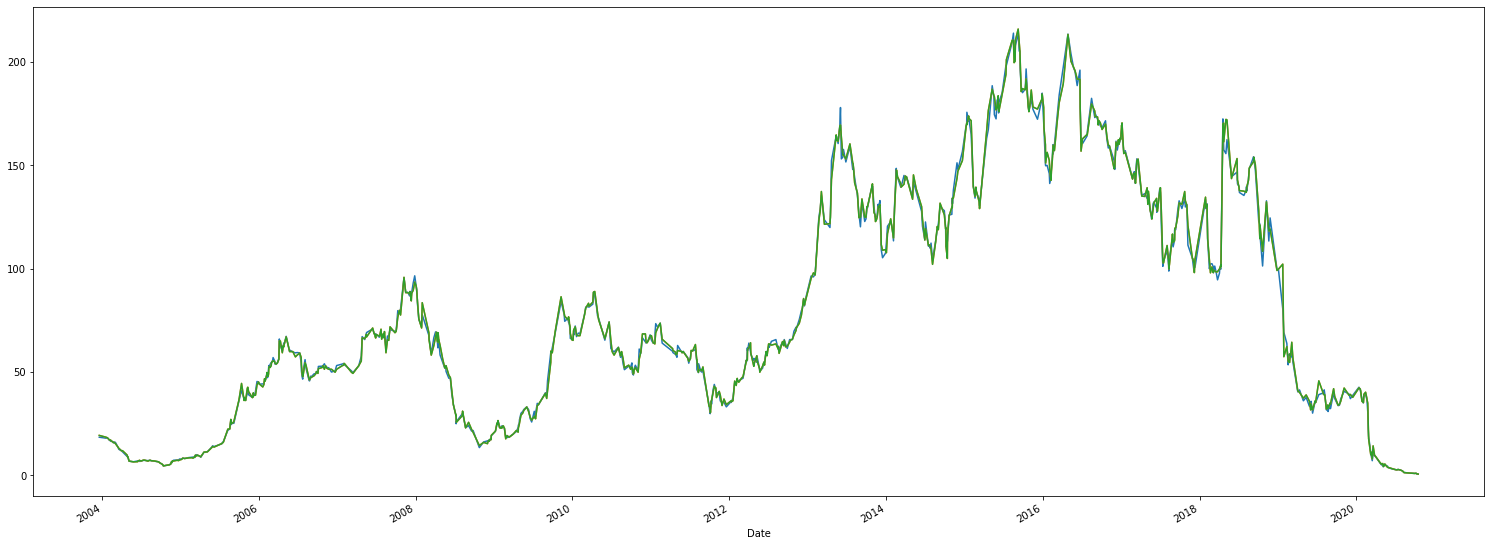

In [56]:
df2['Actual'].plot(figsize=(26,10))
df2['SGD'].plot(figsize=(26,10))
df2['LR'].plot(figsize=(26,10))

<AxesSubplot:xlabel='Date'>

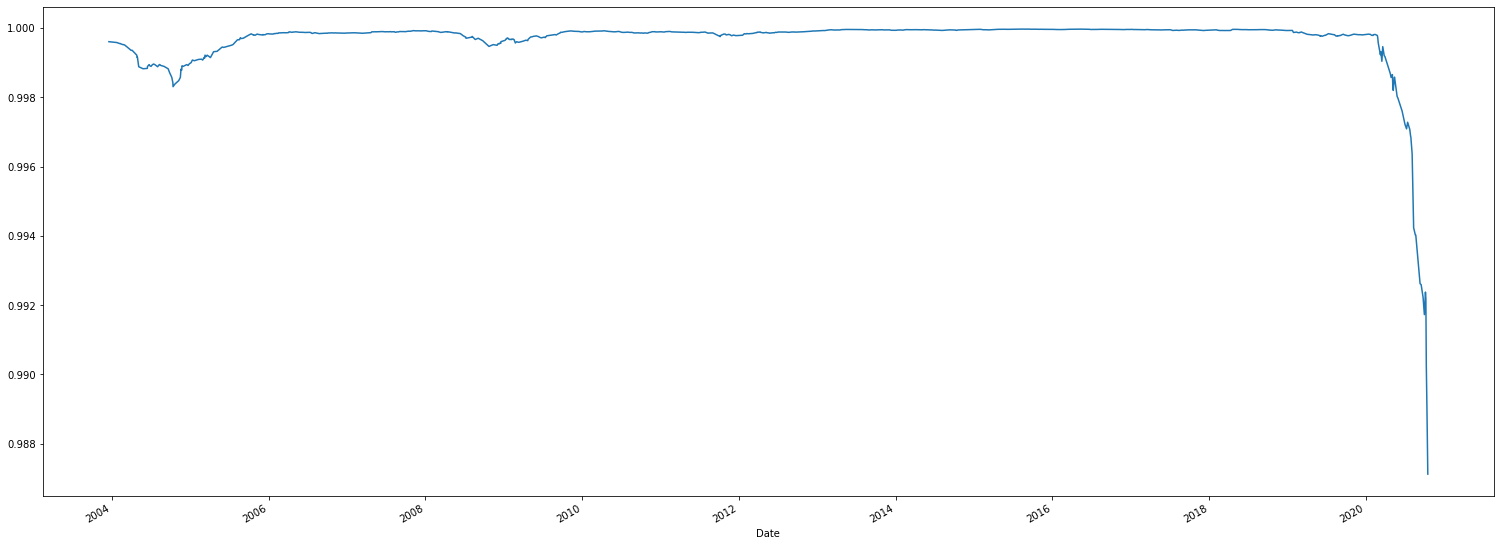

In [57]:
diffSGD_LR = df2['SGD']/df2['LR']
diffSGD_LR.plot(figsize=(26,10))

In [58]:
diffAct_LR = df2['Actual']/df2['LR']
diffAct_SGD = df2['Actual']/df2['SGD']

meanVal = (df2['LR']+df2['SGD'])/2
diffMeanAct = df2['Actual']/meanVal


<AxesSubplot:xlabel='Date'>

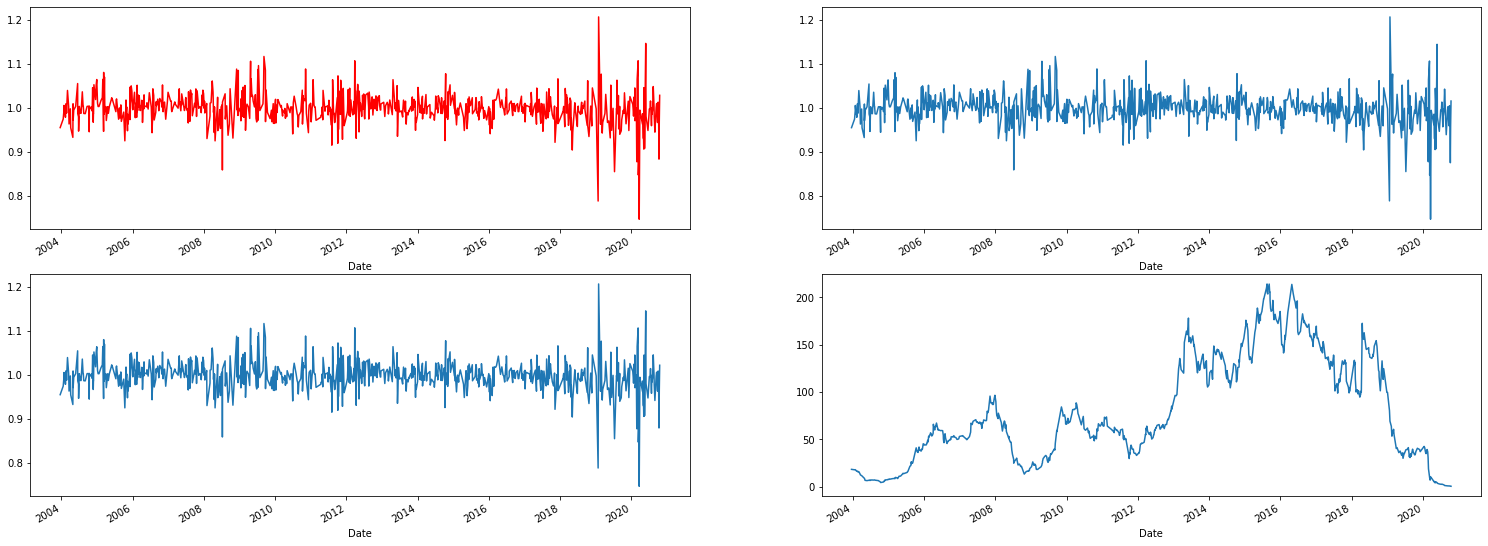

In [59]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)

diffAct_SGD.plot(figsize=(26,10), color = "Red", ax=axes[0,0])
diffAct_LR.plot(figsize=(26,10), ax=axes[0,1])
diffMeanAct.plot(figsize=(26,10), ax=axes[1,0])
df2['Actual'].plot(figsize=(26,10), ax=axes[1,1])

## Predict todays closing price by giving todays opening price

In [87]:
from pandas import DataFrame
#from statistics import mean

def predictPrice(opening, *argv, closing=False): #The args are the prediction algorithms you want to test on
    opPrice=pd.DataFrame([[opening]])
    opPrice=scaler.transform(opPrice)
    i=0
    predList = []
    for model in argv:
        print("Model " +str(i) + " "+ str(model.predict(opPrice)), end=" ")
        predList.append(model.predict(opPrice))
        if closing:
            print(f'The models are off by {float(closing-model.predict(opPrice))} NOK')
        i+=1
    meanVal = sum(predList)/len(predList)
    print(f'The mean of the models are {float(meanVal)} NOK')
    if closing:
        print(f'The mean of the models are off by {float(closing-meanVal)} NOK')


        

In [88]:
predictPrice(0.7090, regressor, sgd, DTreeModel, closing=0.6768	)

Model 0 [0.70537912] The models are off by -0.02857912309417554 NOK
Model 1 [0.69763373] The models are off by -0.020833725205605558 NOK
Model 2 [0.6006] The models are off by 0.07619999999999993 NOK
The mean of the models are 0.6678709494332603 NOK
The mean of the models are off by 0.00892905056673965 NOK
